In [94]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [95]:
def timeSequence(sampleRate, timeDuration, timeIncrement):
    samplesNumber = sampleRate * timeDuration
    return np.arange(samplesNumber) * timeIncrement
#enddef

In [96]:
def sineWave(amplitude, frequency, timeSequence):
    omega = (2 * np.pi) * frequency
    return np.sin(omega * timeSequence) * amplitude
#enddef

In [97]:
#Default Parameters for time sequence
sampleRate = 44100 #samples in a second
timeDuration = 0.1 #total seconds
timeIncrement = 1 / sampleRate #time increment (duration of a sample)
amplitude = 1

#Default time axis
time = timeSequence(sampleRate, timeDuration, timeIncrement)

trainArrayLF = []
trainArrayHF = []

In [98]:
def generateSineWaves(startFreq, endFreq, sineArray, step):
    for i in range(startFreq, endFreq, step):
        sineArray.append(sineWave(amplitude, i, time))
#enddef

In [99]:
generateSineWaves(100, 3000, trainArrayLF, 5)
generateSineWaves(5000, 7900, trainArrayHF, 5)

print(len(trainArrayLF))
print(len(trainArrayHF))

trainVectorLF = np.zeros((len(trainArrayLF), 1))
trainVectorHF = np.ones((len(trainArrayHF), 1))

580
580


In [100]:
def addNoise(sineArray, noiseArray):
    for i in range (0, len(sineArray), 1):
        for j in range (0, len(sineArray[i]), 1):
            sineArray[i][j] = sineArray[i][j] + noiseArray[j]
#enddef

noiseArray = np.random.normal(0,0.15, 4410)

In [101]:
for i in range(0, len(noiseArray), 1):
    print(noiseArray[i], '\n')

-0.15540452490180004 

0.017864389085236704 

0.0868846698937837 

-0.2154109414062168 

-0.017782628126678506 

0.027703488737689956 

-0.2571394009691381 

0.06332706592220569 

-0.1320830682275192 

0.017948077443442116 

0.15284746134295563 

-0.2846243371731922 

0.05814038803710499 

0.021424204678842602 

0.005449971897983805 

-0.18493023386225335 

0.0035927989658641624 

-0.1279381334618507 

-0.22008086389391243 

0.0033292078610120436 

-0.18657992045806943 

-0.05404335311136722 

-0.07782195771856683 

-0.2157395610659677 

0.22810920146478633 

0.1576153359212396 

0.265188576351822 

0.005857047661531754 

-0.24157700172600322 

-0.003591262717720801 

-0.03579359365886839 

0.03415467547238494 

-0.0954473732100477 

0.1459499364948927 

0.061913595712287564 

-0.13015558937404625 

-0.006592577739301077 

0.0968520376877233 

-0.21334416614402468 

-0.06372968285163257 

-0.24478965680504083 

0.3480168814448851 

0.020189326914866954 

-0.3379251346722637 

-0.227807

-0.041037411477150926 

-0.15910071218853886 

0.34454193662323135 

-0.004708239218718218 

0.07565007790291856 

0.26470026405166935 

0.022687056417496965 

0.25213337390846435 

-0.2569774639755203 

-0.10555189318233067 

-0.13339030340953678 

-0.07404848856959029 

-0.08495151234153699 

-0.1514834631083171 

0.19666408080509948 

0.38884199645395834 

0.02465381640965199 

0.05422938585052319 

0.007699187884463336 

-0.28446080650753364 

0.2933331664310274 

0.09079511143121162 

0.11737240744864642 

-0.070453134858246 

-0.019353404411482204 

0.09927492587189274 

-0.13338586850152287 

0.21659869937194323 

-0.0008009927621828606 

0.09732554945792775 

-0.0346518242166365 

-0.11361426745398016 

-0.0550237022794745 

0.12356444296839526 

0.10463819880834661 

-0.07790906462919703 

-0.16964908575409618 

0.1258912881551749 

-0.3279319439900654 

-0.1527465942331854 

-0.005131534313671316 

0.044749268250337156 

0.10296604846391252 

0.1491727603747008 

-0.011135908

-0.05896580985360676 

0.12441887108513745 

0.0165689938506378 

0.03398885452704746 

-0.1157516266168494 

0.16508063595992498 

0.35417947700252544 

0.017960426947959626 

-0.021817061507129133 

-0.3083929061081004 

-0.12187900722290357 

0.20855498999601413 

0.04987178974154831 

-0.04802243910768202 

0.11184067517174164 

0.10915979430704854 

-0.17007737989711444 

0.08787903294383922 

0.015514766889839719 

-0.2583489944126334 

0.11654134399257149 

0.0521083066827712 

-0.1293289657608855 

-0.1657563415982242 

-0.05301385057823887 

0.2027225380643933 

-0.3233639774754716 

-0.2664533531744841 

0.27036004788606954 

-0.05975316648494701 

0.0688220904940003 

0.2803319095625267 

-0.1350519001698713 

0.055685235646088696 

0.15275216861951743 

-0.0023448445562117633 

0.20618136705755685 

0.2490979414233201 

0.09006368288268679 

-0.20072692759451105 

-0.01414325715110368 

-0.08108667436633545 

-0.23748885533595882 

0.33814470269050345 

0.22037864482777328 

In [102]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(4410, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(441, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(220, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.001, momentum=1e-08), loss='binary_crossentropy', metrics=['accuracy'])

In [103]:
trainArrayLF.extend(trainArrayHF)
trainArray = np.asarray(trainArrayLF)
trainVector = np.append(trainVectorLF, trainVectorHF, axis=0)

print(trainArray.shape)
print(trainVector.shape)

(1160, 4410)
(1160, 1)


In [104]:
#model.fit(trainArray, trainVector, epochs=500)

loaded_model = tf.keras.models.load_model('sine_waves_tryout.model')

In [113]:
testArrayLF = []
generateSineWaves(1800, 2300, testArrayLF, 1)
addNoise(testArrayLF, noiseArray)
testArrayLFNP = np.asarray(testArrayLF)

In [114]:
randomFreq = loaded_model.predict([testArrayLFNP])

startFreq=1800
for freq in randomFreq:
    print('Prediction for ', startFreq, 'Hz :', freq, '\n')
    startFreq=startFreq+1

Prediction for  1800 Hz : [0.00292598] 

Prediction for  1801 Hz : [0.00323457] 

Prediction for  1802 Hz : [0.00817622] 

Prediction for  1803 Hz : [0.01376986] 

Prediction for  1804 Hz : [0.00575148] 

Prediction for  1805 Hz : [0.00364994] 

Prediction for  1806 Hz : [0.00931618] 

Prediction for  1807 Hz : [0.03669221] 

Prediction for  1808 Hz : [0.02921387] 

Prediction for  1809 Hz : [0.01186987] 

Prediction for  1810 Hz : [0.00212026] 

Prediction for  1811 Hz : [0.00281994] 

Prediction for  1812 Hz : [0.00540403] 

Prediction for  1813 Hz : [0.00708745] 

Prediction for  1814 Hz : [0.0061615] 

Prediction for  1815 Hz : [0.00563034] 

Prediction for  1816 Hz : [0.02865814] 

Prediction for  1817 Hz : [0.02032389] 

Prediction for  1818 Hz : [0.00340599] 

Prediction for  1819 Hz : [0.00163765] 

Prediction for  1820 Hz : [0.00232319] 

Prediction for  1821 Hz : [0.00503975] 

Prediction for  1822 Hz : [0.00688881] 

Prediction for  1823 Hz : [0.01050876] 

Prediction for  1

Prediction for  2261 Hz : [0.01837358] 

Prediction for  2262 Hz : [0.02782956] 

Prediction for  2263 Hz : [0.01471113] 

Prediction for  2264 Hz : [0.00686965] 

Prediction for  2265 Hz : [0.00491348] 

Prediction for  2266 Hz : [0.00763884] 

Prediction for  2267 Hz : [0.00874849] 

Prediction for  2268 Hz : [0.00948574] 

Prediction for  2269 Hz : [0.00434005] 

Prediction for  2270 Hz : [0.00356246] 

Prediction for  2271 Hz : [0.0054135] 

Prediction for  2272 Hz : [0.00349495] 

Prediction for  2273 Hz : [0.00177322] 

Prediction for  2274 Hz : [0.00077336] 

Prediction for  2275 Hz : [0.00086708] 

Prediction for  2276 Hz : [0.00300903] 

Prediction for  2277 Hz : [0.00873556] 

Prediction for  2278 Hz : [0.00521594] 

Prediction for  2279 Hz : [0.00254983] 

Prediction for  2280 Hz : [0.00261885] 

Prediction for  2281 Hz : [0.0114196] 

Prediction for  2282 Hz : [0.02330708] 

Prediction for  2283 Hz : [0.02063634] 

Prediction for  2284 Hz : [0.0039512] 

Prediction for  228

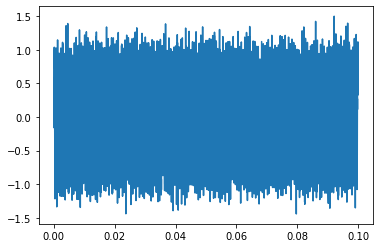

In [115]:
plt.plot(time, testArrayLFNP[5])

In [116]:
testArrayHF = []
generateSineWaves(6200, 7300, testArrayHF, 1)
addNoise(testArrayHF, noiseArray)
testArrayHFNP = np.asarray(testArrayHF)

In [117]:
randomHFreq = loaded_model.predict([testArrayHFNP])

startHFreq=6200
for freq in randomHFreq:
    print('Prediction for ', startHFreq, 'Hz :', freq, '\n')
    startHFreq=startHFreq+1

Prediction for  6200 Hz : [0.99992144] 

Prediction for  6201 Hz : [0.9998573] 

Prediction for  6202 Hz : [0.99976176] 

Prediction for  6203 Hz : [0.9997596] 

Prediction for  6204 Hz : [0.99968743] 

Prediction for  6205 Hz : [0.999554] 

Prediction for  6206 Hz : [0.9983822] 

Prediction for  6207 Hz : [0.99678326] 

Prediction for  6208 Hz : [0.99589515] 

Prediction for  6209 Hz : [0.9981047] 

Prediction for  6210 Hz : [0.99960905] 

Prediction for  6211 Hz : [0.9997868] 

Prediction for  6212 Hz : [0.99976915] 

Prediction for  6213 Hz : [0.9997631] 

Prediction for  6214 Hz : [0.9997764] 

Prediction for  6215 Hz : [0.99951804] 

Prediction for  6216 Hz : [0.99398106] 

Prediction for  6217 Hz : [0.9722252] 

Prediction for  6218 Hz : [0.9660444] 

Prediction for  6219 Hz : [0.99461997] 

Prediction for  6220 Hz : [0.9990393] 

Prediction for  6221 Hz : [0.99942905] 

Prediction for  6222 Hz : [0.99974436] 

Prediction for  6223 Hz : [0.9996556] 

Prediction for  6224 Hz : [0.

Prediction for  6656 Hz : [0.99992514] 

Prediction for  6657 Hz : [0.99982136] 

Prediction for  6658 Hz : [0.9986946] 

Prediction for  6659 Hz : [0.99785185] 

Prediction for  6660 Hz : [0.99903667] 

Prediction for  6661 Hz : [0.99838805] 

Prediction for  6662 Hz : [0.99868125] 

Prediction for  6663 Hz : [0.99897563] 

Prediction for  6664 Hz : [0.99925894] 

Prediction for  6665 Hz : [0.9994949] 

Prediction for  6666 Hz : [0.99934167] 

Prediction for  6667 Hz : [0.9986179] 

Prediction for  6668 Hz : [0.9984629] 

Prediction for  6669 Hz : [0.9990305] 

Prediction for  6670 Hz : [0.99931145] 

Prediction for  6671 Hz : [0.9977603] 

Prediction for  6672 Hz : [0.995654] 

Prediction for  6673 Hz : [0.99548954] 

Prediction for  6674 Hz : [0.9969342] 

Prediction for  6675 Hz : [0.99912757] 

Prediction for  6676 Hz : [0.9988182] 

Prediction for  6677 Hz : [0.99897987] 

Prediction for  6678 Hz : [0.99899954] 

Prediction for  6679 Hz : [0.9995253] 

Prediction for  6680 Hz : [

Prediction for  7156 Hz : [0.9991393] 

Prediction for  7157 Hz : [0.99581933] 

Prediction for  7158 Hz : [0.99416006] 

Prediction for  7159 Hz : [0.99666435] 

Prediction for  7160 Hz : [0.9990841] 

Prediction for  7161 Hz : [0.9975751] 

Prediction for  7162 Hz : [0.984751] 

Prediction for  7163 Hz : [0.97612995] 

Prediction for  7164 Hz : [0.9936434] 

Prediction for  7165 Hz : [0.9986203] 

Prediction for  7166 Hz : [0.99934536] 

Prediction for  7167 Hz : [0.9992981] 

Prediction for  7168 Hz : [0.99973875] 

Prediction for  7169 Hz : [0.9996093] 

Prediction for  7170 Hz : [0.99877065] 

Prediction for  7171 Hz : [0.99636495] 

Prediction for  7172 Hz : [0.9920803] 

Prediction for  7173 Hz : [0.9920557] 

Prediction for  7174 Hz : [0.99739885] 

Prediction for  7175 Hz : [0.999393] 

Prediction for  7176 Hz : [0.99876225] 

Prediction for  7177 Hz : [0.9972379] 

Prediction for  7178 Hz : [0.99835604] 

Prediction for  7179 Hz : [0.99958664] 

Prediction for  7180 Hz : [0.9